<a href="https://colab.research.google.com/github/SantiCusse/Pre-Entrega-Proyecto-Santiago-Cusse-Peschiera/blob/main/Pre_entrega_Proyecto_final_Santiago_Cusseipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Refugio de animales

Siempre me llamó la atención el abandono de mascotas. Cómo el ser humano puede ser tan inhumano a la hora de tratar con otras especies y sobretodo con animales que decidieron incorporar a su familia. El abandono puede no ser la única razón o puede no ser la más probable. Por otro lado es interesante analizar qué animales ingresan al refugio y la edad de los mismos.
Teniendo en cuenta estas variables se pueden tomar acciones para la construcción de nuevos refugios, tanto en dimensión como en recursos necesarios para darle tratamiento a las necesidades de los animales.
También me genera inquietud saber como los refugios gestionan los ingresos y salidas de animales ya que hay que tener en cuenta un monton de factores para poder sostener económicamente un establecimiento de este tipo.
Para este análisis encontrè una base de datos con 31600 registros de un refugio ubicado en una ciudad norteamericana de 85.000 habitantes llamada Bloomington.

In [ ]:
!pip install sodapy

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata

In [ ]:
client = Socrata("data.bloomington.in.gov", None)

results = client.get("e245-r9ub", limit=100000)

df = pd.DataFrame.from_records(results)

A continuación podemos ver la información que contiene el dataset sobre el cual se hizo el análisis

In [ ]:
titles_df = pd.DataFrame(df.columns, columns=['Información'])
print(titles_df)

         Información
0                 id
1         intakedate
2       intakereason
3         istransfer
4        sheltercode
5   identichipnumber
6         animalname
7          breedname
8         basecolour
9        speciesname
10         animalage
11           sexname
12          location
13      movementdate
14      movementtype
15           istrial
16    returnedreason
17    deceasedreason
18    diedoffshelter
19        puttosleep
20             isdoa
21        returndate
22      deceaseddate


In [ ]:
df.shape

(32124, 23)

In [ ]:
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returnedreason,deceasedreason,diedoffshelter,puttosleep,isdoa,returndate,deceaseddate
0,15801,2009-11-28T00:00:00.000,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,2017-05-13T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,NaN,NaN
1,15932,2009-12-08T00:00:00.000,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,NaN,NaN
2,28859,2012-08-10T00:00:00.000,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,2017-04-15T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,2020-02-28T00:00:00.000,NaN
3,28859,2012-08-10T00:00:00.000,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,2020-02-29T00:00:00.000,Reclaimed,False,Stray,Died in care,False,False,False,2023-11-06T00:00:00.000,NaN
4,28859,2012-08-10T00:00:00.000,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,2023-12-17T00:00:00.000,Adoption,True,Stray,Died in care,False,False,False,NaN,NaN


Antes de empezar a hacer el análisis tenemos que hacer una limpieza del dataset. En primer lugar vamos a ver qué columnas tienen datos nulos y su cantidad. Además vamos a eliminar las columnas que consideramos que no aportan información valiosa.

In [ ]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

intakereason            2
identichipnumber     3931
breedname              72
movementdate         4931
returndate          22179
deceaseddate        31192
dtype: int64


In [ ]:
df.dtypes

id                  object
intakedate          object
intakereason        object
istransfer            bool
sheltercode         object
identichipnumber    object
animalname          object
breedname           object
basecolour          object
speciesname         object
animalage           object
sexname             object
location            object
movementdate        object
movementtype        object
istrial               bool
returnedreason      object
deceasedreason      object
diedoffshelter        bool
puttosleep            bool
isdoa                 bool
returndate          object
deceaseddate        object
dtype: object

In [ ]:
#Elimino Columnas que no me aportan información y las que tienen muchos registros nulos
df = df.drop(columns=['returndate'])
df = df.drop(columns=['deceaseddate'])
df = df.drop(columns=['identichipnumber'])

#Elimino los registros con datos nulos
df = df.dropna(subset=['intakereason'])
df = df.dropna(subset=['breedname'])
df = df.dropna(subset=['basecolour'])


In [ ]:
#Convierto el campo 'movementdate' a tipo fecha y me quedo solo con la parte de la fecha, sin la hora
df['movementdate'] = pd.to_datetime(df['movementdate'])

df['movementdate'] = df['movementdate'].dt.date


<ipython-input-12-929646a53314>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


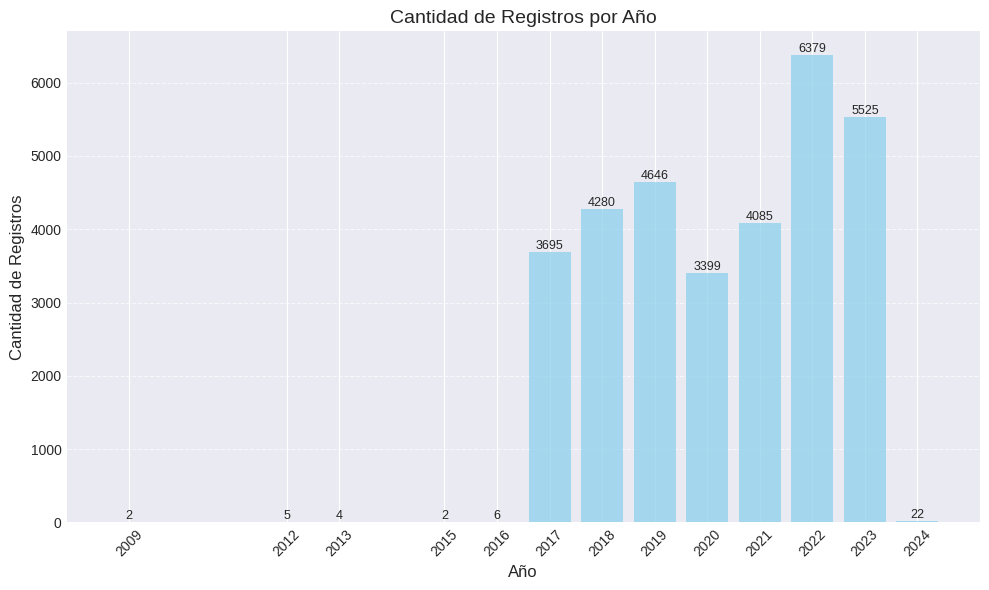

In [ ]:
# Convertir la columna 'intakedate' al formato de fecha si no está en ese formato
df['intakedate'] = pd.to_datetime(df['intakedate'])

# Extraer el año de la columna 'intakedate'
df['year'] = df['intakedate'].dt.year

# Contar la cantidad de registros por año
records_per_year = df['year'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Crear el gráfico de barras
bars = plt.bar(records_per_year.index, records_per_year.values, color='skyblue', alpha=0.7)

# Añadir etiquetas, título y ajustes visuales
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Cantidad de Registros por Año', fontsize=14)
plt.xticks(records_per_year.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar valores en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
#Elimino registros duplicados
df.drop_duplicates(inplace=True)

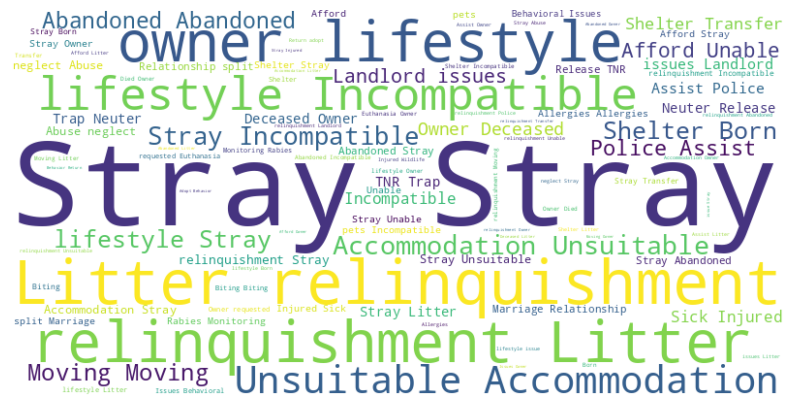

In [ ]:
from wordcloud import WordCloud
# Unir todas las palabras en la columna 'intakereason'
text = ' '.join(df['intakereason'].dropna().astype(str))

# Crear un objeto WordCloud con un tamaño de fuente máxima según la frecuencia
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text)

# Mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Por otro lado hacemos el análisis de los outliers, principalmente sobre la edad de los animales que es un punto importante para nuestro informe. En general tenemos muy pocos registros por encima de los 30 años de edad y pensando en la edad posible de una mascota, es muy raro encontrar animales tan longevos. es por eso que estos registros los voy a excluir del análisis.

In [ ]:
#No me interesa saber en detalle la cantidad de meses que tiene el animal, por lo tanto si tiene meses o semanas lo reemplazo por 0 que se va a interpretar como que tiene menos de 1 año.
df['animalage'] = df['animalage'].apply(lambda x: '0 ' if 'year' not in str(x) else x)
# Separo el campo a partir del primer espacio y me quedo con el primer valor que corresponde a la cantidad de años
df['animalage'] = df['animalage'].str.split().str[0]
# Transformo a tipo numérico
df['animalage'] = pd.to_numeric(df['animalage'], errors='coerce')

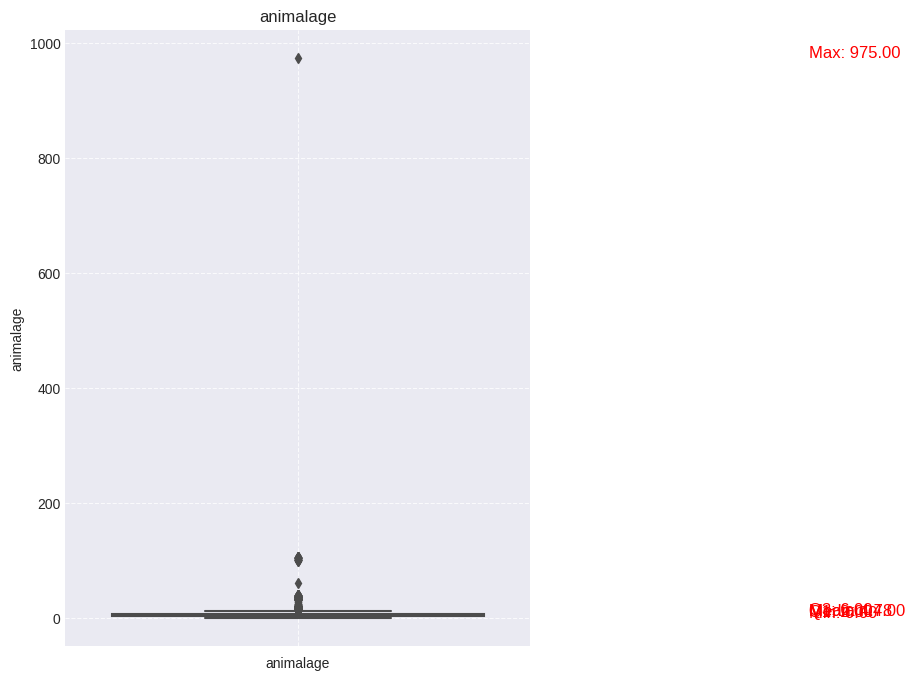

In [ ]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='animalage', palette='Set1')

plt.title('animalage')
plt.xlabel('animalage')
plt.grid(True, linestyle='--', alpha=0.8)

# Calculo estadisticos
age_stats = df['animalage'].describe()
# Marco los valores en el gráfico
plt.text(1.1, age_stats['max'], f'Max: {age_stats["max"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['min'], f'Min: {age_stats["min"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['25%'], f'Q1: {age_stats["25%"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['50%'], f'Median: {age_stats["50%"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['75%'], f'Q3: {age_stats["75%"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['mean'], f'Mean: {age_stats["mean"]:.2f}', fontsize=12, color='red')

plt.show()

In [ ]:
# Calculo de percentiles e IQR
percentile25 = df['animalage'].quantile(0.25)
percentile75 = df['animalage'].quantile(0.75)
iqr = percentile75 - percentile25

# Calculo de límites
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Busco los outliers
outliers_above = df[df['animalage'] > upper_limit][['animalage', 'speciesname']]
outliers_below = df[df['animalage'] < lower_limit][['animalage', 'speciesname']]

In [ ]:
#Analizo los outliers_above
outliers_above_20 = outliers_above[outliers_above['animalage'] > 30]
outliers_above_20_sorted = outliers_above_20.sort_values(by='animalage')
print(outliers_above_20_sorted)

       animalage speciesname
14883         31         Cat
13189         31         Dog
12244         31         Cat
10382         31         Dog
12726         31         Cat
...          ...         ...
649          105        Bird
2156         105         Cat
927          105         Cat
1962         105         Cat
1747         975         Cat

[105 rows x 2 columns]


In [ ]:
# Excluyo los outliers analizados que sean maypres a 22 años ya que es raro que estos animales tengan mas de 30 años
# Los outliers_below no los elimino ya que son los que tienen edad entre 0 y 1 año
df2 = df[(df['animalage'] <30 )].copy()

Con el dataset limpio podemos empezar a hacer distintos análisis de los parametros que tenemos registrados.
En primer lugar me interesa saber qué animales son los que ingresan en mayor cantidad. Intuyo que deben ser perros y gatos pero puede haber algún otro tipo de animal que presente una cantidad considerable de ingresos y amerite su inclusión en el análisis posterior.

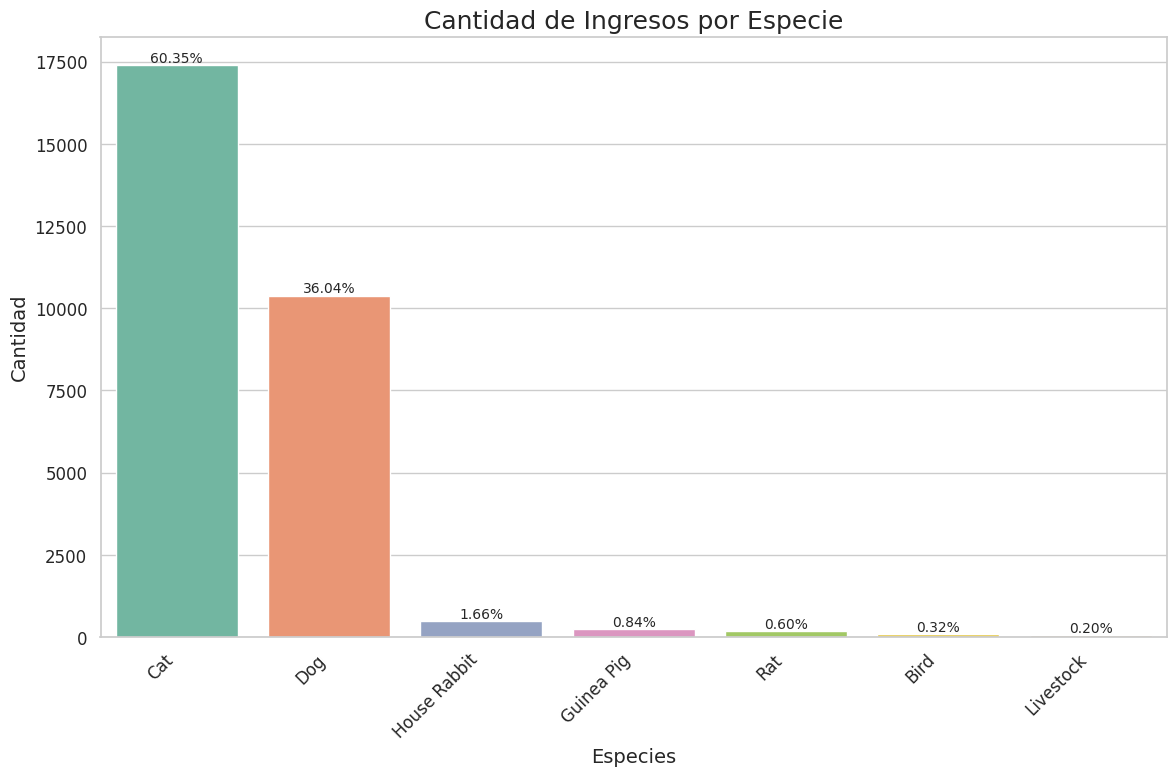

In [ ]:
speciesname_counts = df2['speciesname'].value_counts()
speciesname_more_than_10 = speciesname_counts[speciesname_counts > 50].index.tolist()

filtered_df = df2[df2['speciesname'].isin(speciesname_more_than_10)]

filtered_df_counts = filtered_df['speciesname'].value_counts()

plt.figure(figsize=(12, 8))  # Ajustar tamaño del gráfico para mejor visualización
sns.set(style="whitegrid", font_scale=1.2)  # Cambiar estilo a whitegrid y ajustar tamaño de fuente

ax = sns.countplot(data=filtered_df, x='speciesname', palette='Set2', order=filtered_df['speciesname'].value_counts().index)  # Personalizar paleta de colores y orden de barras
ax.set_title('Cantidad de Ingresos por Especie', fontsize=18)  # Añadir un título al gráfico
ax.set_xlabel('Especies', fontsize=14)  # Etiqueta del eje x
ax.set_ylabel('Cantidad', fontsize=14)  # Etiqueta del eje y

# Rotar etiquetas del eje x para mejor legibilidad y ajustar espacio
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir porcentaje en las barras
total = float(len(filtered_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{(height / total * 100):.2f}%',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()

Claramente tenemos mayoría de gatos y perros pero con una llamativa superioridad de los gatos sobre los perros. Por otro lado aparecen los conejos, ratas, pájaros y cerdos como los más ingresados pero en cantidades muy inferiores a los primeros dos del podio.

Vamos a analizar un poco más en detalle las características de los perros y los gatos que ingresan al refugio. Para esto podemos armar un boxplot de la edad de dichos animales. Los analizamos por separado ya que tanto el comportamiento como la longevidad de los mismos es distinta.

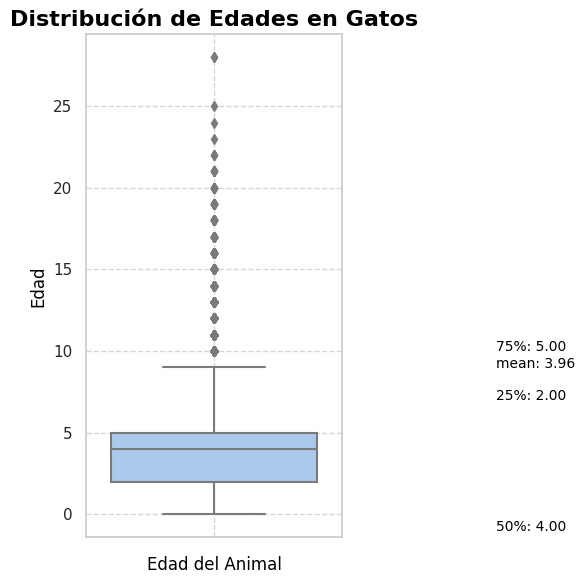

In [ ]:
cat_data = df2[df2['speciesname'] == 'Cat']

plt.figure(figsize=(8, 6))  # Ajustar tamaño del gráfico
sns.set(style="whitegrid", palette="pastel")  # Cambiar estilo y paleta de colores

sns.boxplot(data=cat_data, y='animalage')

plt.title('Distribución de Edades en Gatos', fontsize=16, fontweight='bold', color='black')  # Título
plt.xlabel('Edad del Animal', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Edad', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.8)

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
age_stats = cat_data['animalage'].describe()
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'],
                               [age_stats['25%'], age_stats['50%'], age_stats['75%'], age_stats['mean']],
                               [5, -5, 5, 5]):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()

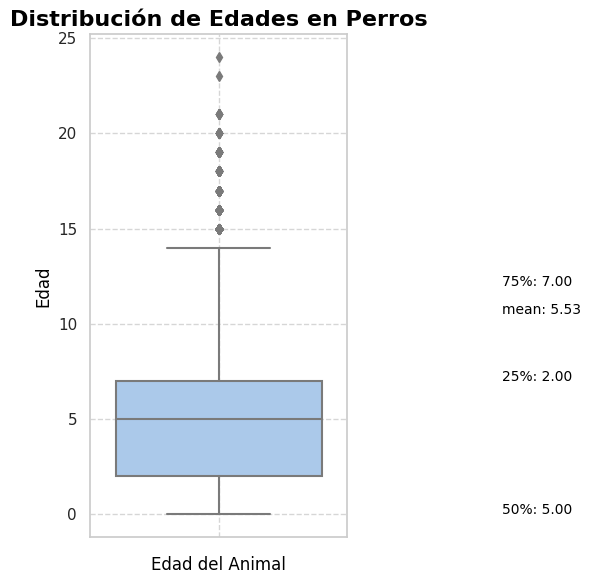

In [ ]:
cat_data = df2[df2['speciesname'] == 'Dog']

plt.figure(figsize=(8, 6))  # Ajustar tamaño del gráfico
sns.set(style="whitegrid", palette="pastel")  # Cambiar estilo y paleta de colores

sns.boxplot(data=cat_data, y='animalage')

plt.title('Distribución de Edades en Perros', fontsize=16, fontweight='bold', color='black')  # Título
plt.xlabel('Edad del Animal', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Edad', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.8)

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
age_stats = cat_data['animalage'].describe()
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'],
                               [age_stats['25%'], age_stats['50%'], age_stats['75%'], age_stats['mean']],
                               [5, -5, 5, 5]):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()


Podemos ver que hay una diferencia en interesante en la edad media que tienen estos animales al momento de ingresar al refugio. Si bien los gatos en buenas condiciones viven más que los perros, vemos que ingresan al refugio a una edad más temprana. En ambos casos el promedio ingresa por encima de los 3 años de edad por lo cual se puede decir que ya son animales adultos.

Ahora que entendemos un poco más sobre la característica de los aniamles que ingresan, vamos a estudiar las razones por las que ingresan. En primer lugar listamos todas las razones que podemos encontrar en el dataset y luego hacemos foco en las más comunes para sacar conclusiones.

In [ ]:

filtered_intakereason_sorted = filtered_df_counts.sort_values(ascending=False)

total_count = filtered_intakereason_sorted.sum()

for intakereason, count in filtered_intakereason_sorted.items():
    percentage = (count / total_count) * 100
    print(f"intakereason: {intakereason}, Count: {count}, Percentage: {percentage:.2f}%")

intakereason: Cat, Count: 17390, Percentage: 60.35%
intakereason: Dog, Count: 10383, Percentage: 36.04%
intakereason: House Rabbit, Count: 477, Percentage: 1.66%
intakereason: Guinea Pig, Count: 241, Percentage: 0.84%
intakereason: Rat, Count: 172, Percentage: 0.60%
intakereason: Bird, Count: 92, Percentage: 0.32%
intakereason: Livestock, Count: 58, Percentage: 0.20%


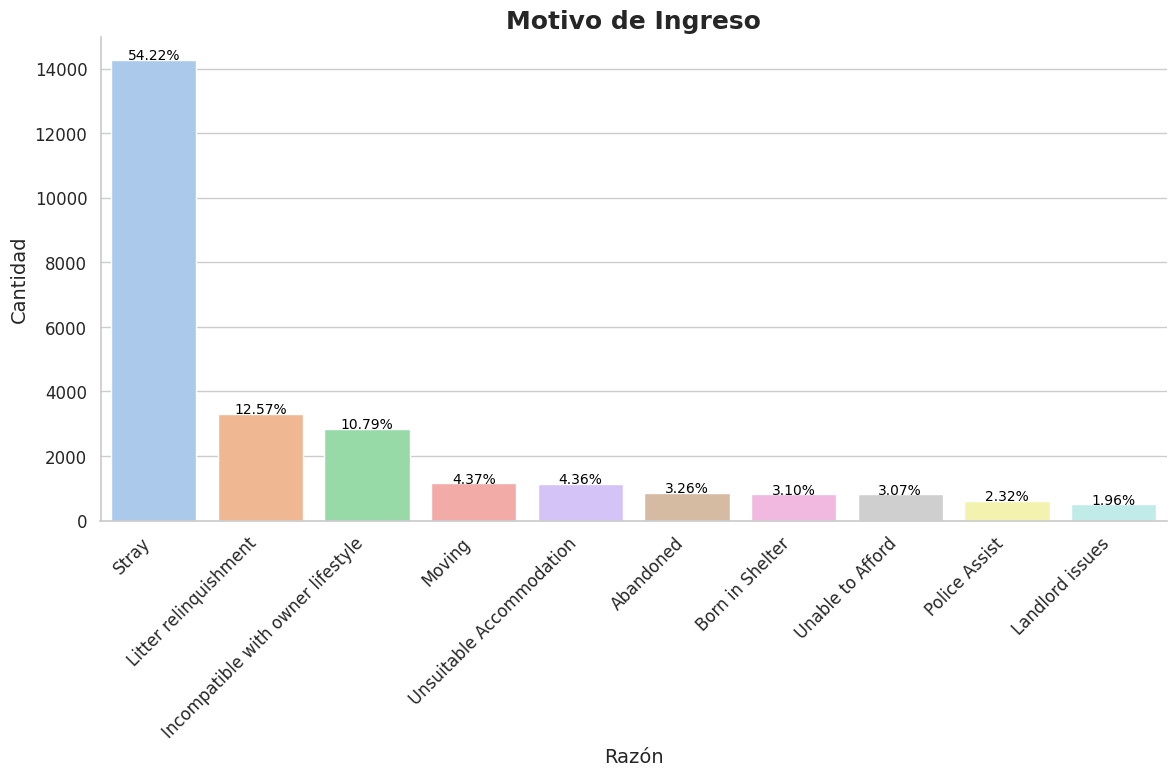

In [ ]:
intakereason_counts = df2['intakereason'].value_counts()
intakereason_more_than_10 = intakereason_counts[intakereason_counts > 500].index.tolist()

filtered_df = df2[df2['intakereason'].isin(intakereason_more_than_10)]

filtered_df_counts = filtered_df['intakereason'].value_counts()

plt.figure(figsize=(12, 8))  # Ajustar tamaño del gráfico para mejor visualización
sns.set(style="whitegrid", font_scale=1.2)  # Cambiar estilo a whitegrid y ajustar tamaño de fuente

ax = sns.countplot(data=filtered_df, x='intakereason', order=filtered_df['intakereason'].value_counts().index, palette='pastel')

total_valores = len(filtered_df)

for i, count in enumerate(filtered_df['intakereason'].value_counts()):
    porcentaje = (count / total_valores) * 100
    plt.text(i, count + 5, f'{porcentaje:.2f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Razón', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_title('Motivo de Ingreso', fontsize=18, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

A continuación vemos cuales son las 5 principales razones por las que los animales ingresan al refugio. Podemos observar un dato muy interesante que es que el 50% de los ingresos se deben a que los animales se pierden. En segundo lugar tenemos al abandono que acumula aproximadamente un 30% de los casos (Se consideraron casos de abandono a :
-Litter relinquishment
-Incompatible with owner lifestyle
-Moving)

A continuación vamos a calcular la cantidad de días promedio que un animal puede estar en el refugio. Además podríamos ver como distribuyen los datos para entender los valores máximos y mínimos que se manejan en un refugio de estas caracterìsticas.

In [ ]:
from datetime import datetime

df2['intakedate'] = pd.to_datetime(df2['intakedate'])
df2['movementdate'] = pd.to_datetime(df2['movementdate'])


df2['movementdate'].fillna(pd.to_datetime(datetime.today().date()), inplace=True)

df2['date_difference'] = (df2['movementdate'] - df2['intakedate']).dt.days

df2['date_difference'] = df2['date_difference'].mask(df2['date_difference'] < 0, 0)

print(df2)

In [ ]:
# Calcula los límites para los outliers
q1 = df2['date_difference'].quantile(0.25)
q3 = df2['date_difference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtra el DataFrame original para crear uno nuevo sin outliers y solo con 'Cat' o 'Dog'
df3 = df2[
    (df2['date_difference'] >= lower_bound) & (df2['date_difference'] <= upper_bound) &
    (df2['speciesname'].isin(['Cat', 'Dog']))
].copy()

# Verifica el nuevo DataFrame sin outliers y solo con 'Cat' o 'Dog'
print(df3)

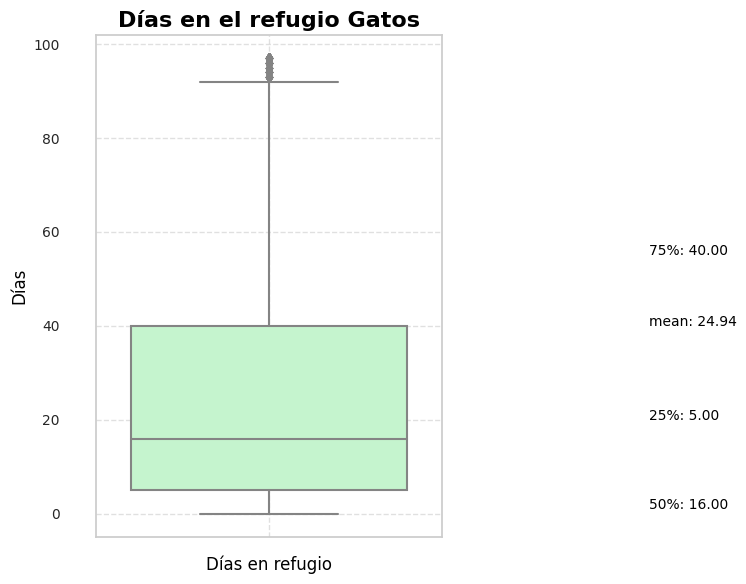

In [ ]:

cat_data_dias = df3[df3['speciesname'] == 'Cat']
plt.figure(figsize=(10, 6))  # Ajustar tamaño del gráfico
custom_palette = sns.color_palette(['#BDFCC9', '#98FB98', '#7FFFD4', '#66CDAA', '#20B2AA'])  # Definir una paleta de verdes claros
sns.set(style="whitegrid", palette=custom_palette)  # Establecer estilo y paleta de colores



# Filtrar outliers para el gráfico de caja
q1 = cat_data_dias['date_difference'].quantile(0.25)
q3 = cat_data_dias['date_difference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_df_cat = cat_data_dias[(cat_data_dias['date_difference'] >= lower_bound) & (cat_data_dias['date_difference'] <= upper_bound)]

sns.boxplot(data=filtered_df_cat, y='date_difference')

plt.title('Días en el refugio Gatos', fontsize=16, fontweight='bold', color='black')  # Título más claro y en negrita
plt.xlabel('Días en refugio', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Días', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.6)  # Reducir opacidad de la cuadrícula

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
date_stats = filtered_df_cat['date_difference'].describe()
vertical_offsets = [15, -15, 15, 15]  # Ajuste vertical de las etiquetas
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'], [date_stats['25%'], date_stats['50%'], date_stats['75%'], date_stats['mean']], vertical_offsets):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico

# Ajustar espaciado entre los ticks del eje y
plt.yticks(fontsize=10)  # Tamaño de fuente
plt.gca().tick_params(axis='y', which='major', pad=20)  # Ajuste de espaciado entre los ticks del eje y

plt.show()

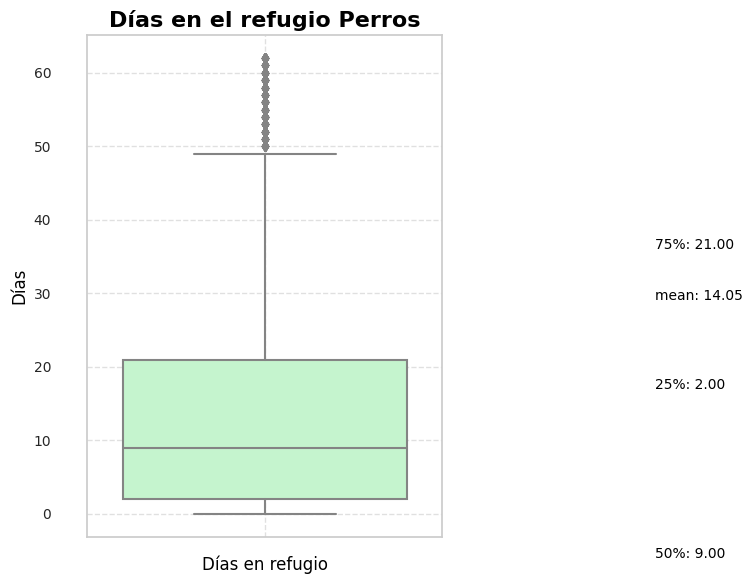

In [ ]:
Dog_data_dias = df3[df3['speciesname'] == 'Dog']

plt.figure(figsize=(10, 6))  # Ajustar tamaño del gráfico
custom_palette = sns.color_palette(['#BDFCC9', '#98FB98', '#7FFFD4', '#66CDAA', '#20B2AA'])  # Definir una paleta de verdes claros
sns.set(style="whitegrid", palette=custom_palette)  # Establecer estilo y paleta de colores

# Filtrar outliers para el gráfico de caja
q1 = Dog_data_dias['date_difference'].quantile(0.25)
q3 = Dog_data_dias['date_difference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_df_dog = Dog_data_dias[(Dog_data_dias['date_difference'] >= lower_bound) & (Dog_data_dias['date_difference'] <= upper_bound)]

sns.boxplot(data=filtered_df_dog, y='date_difference')

plt.title('Días en el refugio Perros', fontsize=16, fontweight='bold', color='black')  # Título más claro y en negrita
plt.xlabel('Días en refugio', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Días', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.6)  # Reducir opacidad de la cuadrícula

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
date_stats = filtered_df_dog['date_difference'].describe()
vertical_offsets = [15, -15, 15, 15]  # Ajuste vertical de las etiquetas
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'], [date_stats['25%'], date_stats['50%'], date_stats['75%'], date_stats['mean']], vertical_offsets):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico

# Ajustar espaciado entre los ticks del eje y
plt.yticks(fontsize=10)  # Tamaño de fuente
plt.gca().tick_params(axis='y', which='major', pad=20)  # Ajuste de espaciado entre los ticks del eje y

plt.show()

In [ ]:

max_date_difference = df3['date_difference'].max()

mean_date_difference = df3['date_difference'].mean()

print(f"Maximo de dias en refugio: {max_date_difference:.2f}")

print(f"Promedio general dias en refugio: {mean_date_difference}")

Maximo de dias en refugio: 127.00
Promedio general dias en refugio: 24.39423709306149


In [ ]:
df3.shape

(24319, 21)

Podemos observar que la cantidad de días promedio es de 24, es decir aproximadamente 1 mes.
Este es un dato sumamente importante porque a partir del mismo se pueden calcular los recursos necesarios para tener en funcionamiento el refugio. Además se puede tener bajo control la rotación de los animales revisando los casos que estan por encima de la estadía promedio para reforzar las medidas que se toman para encontrarles un hogar.

Vamos a seguir analizando el dataset pero solamente para las especies de Perro y Gato ya que estos abarcan más del 90% de los casos. Lo que nos interesa saber es qué variables nos explican la cantidad de días que un perro o un gato estàn en trànsito en el refugio. En base a esto, una vez ingresado un animal vamos a poder estimar la cantidad de días que va a ocupar un espacio, la cantidad de alimento y medicamentos que va a necesitar.

In [ ]:
df3 = df3[df3['sexname'] != 'Unknown']

Hacemos un analisis PCA para ver en qué procentaje explican las variables independientes 'x' a la variable dependiente Y (CAntidad de días en el refugio)

In [ ]:
from sklearn.preprocessing import LabelEncoder

x = df3[['intakereason', 'breedname', 'basecolour', 'speciesname', 'animalage', 'sexname']]
y = df3['date_difference']

label_encoder = LabelEncoder()

x['intakereason'] = label_encoder.fit_transform(x['intakereason'])
x['breedname'] = label_encoder.fit_transform(x['breedname'])
x['basecolour'] = label_encoder.fit_transform(x['basecolour'])
x['speciesname'] = label_encoder.fit_transform(x['speciesname'])
x['animalage'] = label_encoder.fit_transform(x['speciesname'])
x['sexname'] = label_encoder.fit_transform(x['speciesname'])

x1=x[['intakereason', 'breedname', 'basecolour', 'speciesname', 'animalage', 'sexname']]

In [ ]:
# Crear una copia de las columnas categóricas de df3
xc = cat_data_dias[['breedname','intakereason', 'basecolour', 'speciesname', 'animalage', 'sexname']].copy()
yc = cat_data_dias['date_difference']
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica en el DataFrame 'x'
for column in xc.columns:
    xc[column] = label_encoder.fit_transform(xc[column])


# Crear una copia de las columnas categóricas de df3
xd = Dog_data_dias[['breedname','intakereason', 'basecolour', 'speciesname', 'animalage', 'sexname']].copy()
yd = Dog_data_dias['date_difference']
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica en el DataFrame 'x'
for column in x.columns:
    xd[column] = label_encoder.fit_transform(xd[column])


Porcentaje de varianza explicada por cada componente
[2.29253016e-01 2.05503134e-01 2.00416754e-01 1.91730509e-01
 1.73096586e-01 7.69345732e-35]


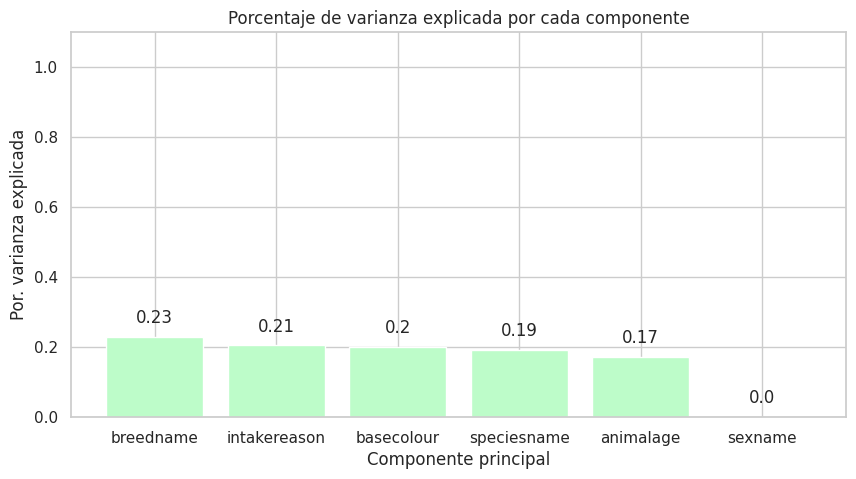

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Entrenar un modelo de PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(xc)

# Extraer el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

# Crear un gráfico de barras para mostrar el porcentaje de varianza explicada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
barplot = ax.bar(x=np.arange(modelo_pca.n_components_) + 1, height=modelo_pca.explained_variance_ratio_)

# Etiquetar el eje x con los nombres de las variables
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xticklabels(xc.columns)  # Asumiendo que 'x' es un DataFrame de pandas

# Anotar los valores en el gráfico
for i, y in enumerate(modelo_pca.explained_variance_ratio_, start=1):
    label = round(y, 2)
    ax.annotate(label, (i, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Configurar el gráfico
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

# Mostrar el gráfico
plt.show()



Porcentaje de varianza explicada por cada componente
[2.23842378e-01 2.18036640e-01 1.97215344e-01 1.87534031e-01
 1.73371607e-01 7.15472737e-34]


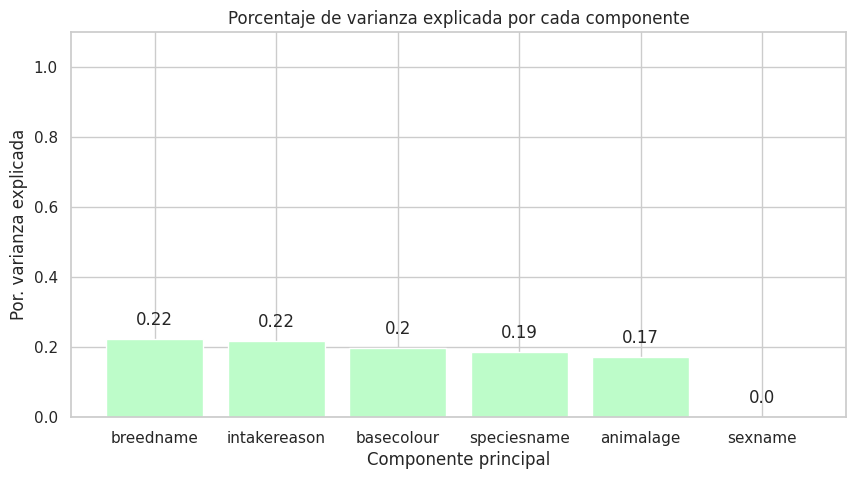

In [ ]:

# Entrenar un modelo de PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(xd)

# Extraer el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

# Crear un gráfico de barras para mostrar el porcentaje de varianza explicada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
barplot = ax.bar(x=np.arange(modelo_pca.n_components_) + 1, height=modelo_pca.explained_variance_ratio_)

# Etiquetar el eje x con los nombres de las variables
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xticklabels(xd.columns)  # Asumiendo que 'x' es un DataFrame de pandas

# Anotar los valores en el gráfico
for i, y in enumerate(modelo_pca.explained_variance_ratio_, start=1):
    label = round(y, 2)
    ax.annotate(label, (i, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Configurar el gráfico
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

# Mostrar el gráfico
plt.show()


In [ ]:

x1 = Dog_data_dias['breedname']
y1 = Dog_data_dias['date_difference']

# Suponiendo que ya has aplicado el LabelEncoder a 'breedname' en 'x'

# Concatenar 'x' y 'y' para el análisis
data = pd.concat([x1, y1], axis=1)

# Calcular la media de 'date_difference' por cada valor de 'breedname'
breedname_analysis = data.groupby('breedname')['date_difference'].mean().sort_values(ascending=False)

# Mostrar solo las 10 principales categorías
top_10_breeds = breedname_analysis.head(10)
print(top_10_breeds)

breedname
Mountain Cur/Bully Breed Mix                115.000000
Terrier/Whippet                             111.000000
Border Collie/Heeler                        107.500000
Labrador Retriever/Australian Cattle Dog     94.666667
Hound/Pit Bull Terrier                       90.000000
Schnauzer, Standard/Poodle                   86.000000
Pitbull/Whippet                              82.500000
Fox Terrier/Jack Russell Terrier             75.000000
Australian Cattle Dog/Basset Hound           75.000000
Labrador Retriever/Affenpinscher             73.500000
Name: date_difference, dtype: float64


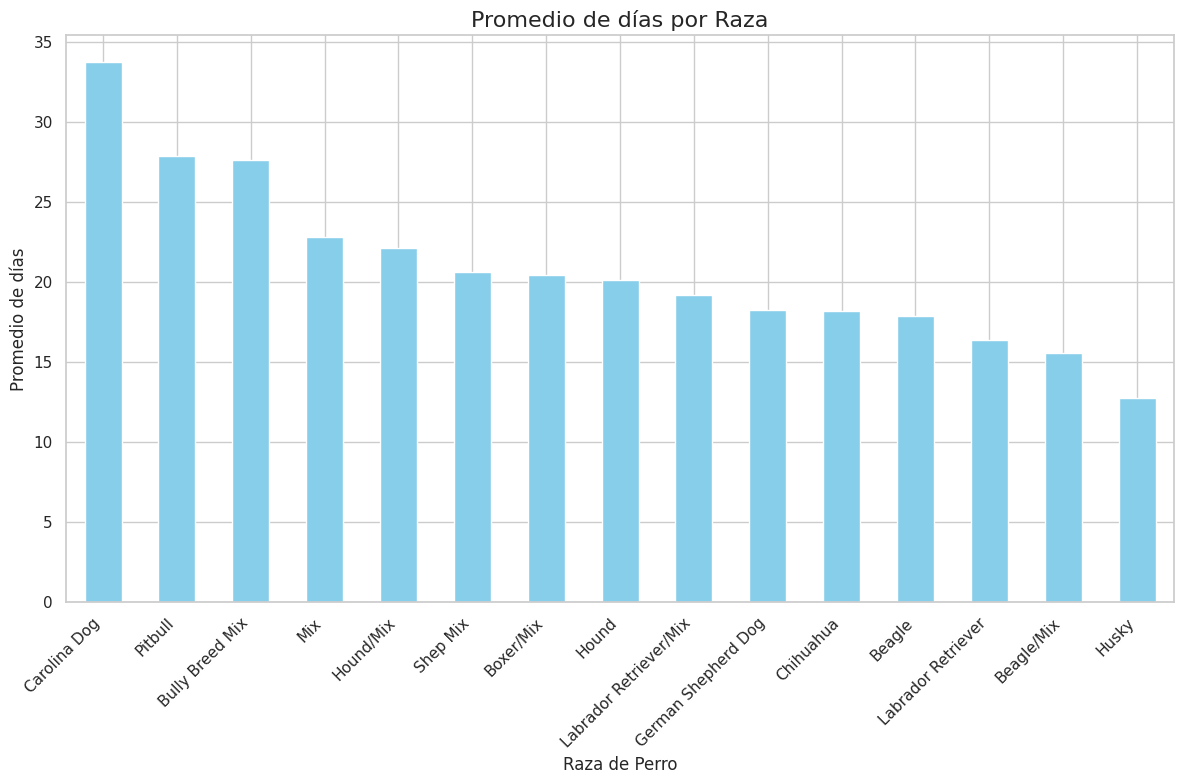

In [ ]:
# Encontrar los breedname más comunes (por ejemplo, los top 10)
top_breedname = Dog_data_dias['breedname'].value_counts().head(15).index.tolist()

# Filtrar el DataFrame para incluir solo los breedname más comunes
filtered_data_top_breedname = Dog_data_dias[Dog_data_dias['breedname'].isin(top_breedname)]

# Calcular la media de 'date_difference' por cada breedname más común
breedname_means = filtered_data_top_breedname.groupby('breedname')['date_difference'].mean().sort_values(ascending=False)

# Graficar el promedio de días para los breedname más comunes
plt.figure(figsize=(12, 8))
breedname_means.plot(kind='bar', color='skyblue')
plt.title('Promedio de días por Raza', fontsize=16)
plt.xlabel('Raza de Perro', fontsize=12)
plt.ylabel('Promedio de días', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

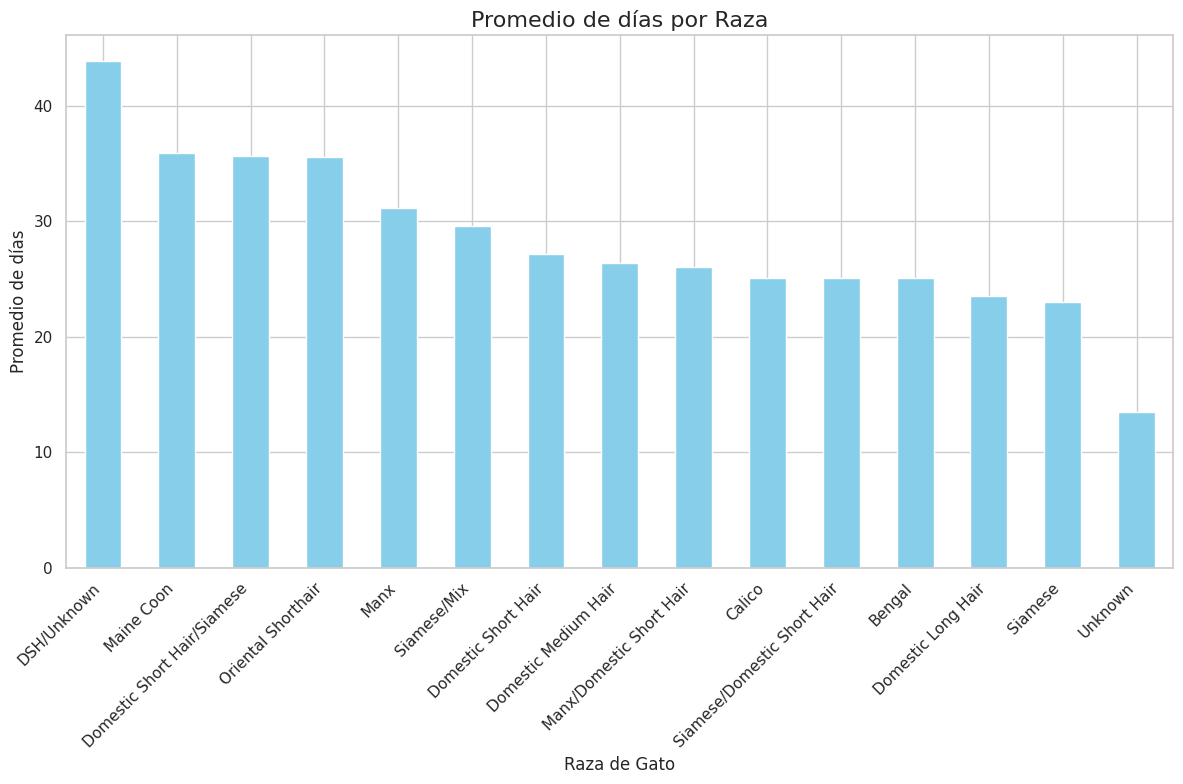

In [ ]:
# Encontrar los breedname más comunes (por ejemplo, los top 10)
top_breedname = cat_data_dias['breedname'].value_counts().head(15).index.tolist()

# Filtrar el DataFrame para incluir solo los breedname más comunes
filtered_data_top_breedname = cat_data_dias[cat_data_dias['breedname'].isin(top_breedname)]

# Calcular la media de 'date_difference' por cada breedname más común
breedname_means = filtered_data_top_breedname.groupby('breedname')['date_difference'].mean().sort_values(ascending=False)

# Graficar el promedio de días para los breedname más comunes
plt.figure(figsize=(12, 8))
breedname_means.plot(kind='bar', color='skyblue')
plt.title('Promedio de días por Raza', fontsize=16)
plt.xlabel('Raza de Gato', fontsize=12)
plt.ylabel('Promedio de días', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
x2 = df3['sexname']
y1 = df3['date_difference']

# Suponiendo que ya has aplicado el LabelEncoder a 'breedname' en 'x'

# Concatenar 'x' y 'y' para el análisis
data = pd.concat([x2, y1], axis=1)

# Calcular la media de 'date_difference' por cada valor de 'breedname'
breedname_analysis = data.groupby('sexname')['date_difference'].mean().sort_values(ascending=False)

# Mostrar solo las 10 principales categorías
top_10_breeds = breedname_analysis.head(10)
print(top_10_breeds)

sexname
Female    25.762440
Male      23.305235
Name: date_difference, dtype: float64


In [ ]:
x2 = df3['animalage']
y1 = df3['date_difference']

# Suponiendo que ya has aplicado el LabelEncoder a 'breedname' en 'x'

# Concatenar 'x' y 'y' para el análisis
data = pd.concat([x2, y1], axis=1)

# Calcular la media de 'date_difference' por cada valor de 'breedname'
breedname_analysis = data.groupby('animalage')['date_difference'].mean().sort_values(ascending=False)

# Mostrar solo las 10 principales categorías
top_10_breeds = breedname_analysis.head(40)
print(top_10_breeds)

animalage
0     25.956594
2     25.842397
1     25.774314
8     25.386511
3     25.351962
4     24.940641
9     24.757951
5     24.476668
6     24.198160
11    23.727941
10    23.357430
13    21.533088
12    21.057432
7     21.049822
15    19.855670
14    19.627530
16    19.547486
17    14.897196
22    14.000000
18    13.876712
19    12.051724
20     8.000000
21     6.615385
23     0.000000
24     0.000000
25     0.000000
28     0.000000
Name: date_difference, dtype: float64


In [ ]:
x2 = df3['basecolour']
y1 = df3['date_difference']

# Suponiendo que ya has aplicado el LabelEncoder a 'breedname' en 'x'

# Concatenar 'x' y 'y' para el análisis
data = pd.concat([x2, y1], axis=1)

# Calcular la media de 'date_difference' por cada valor de 'breedname'
breedname_analysis = data.groupby('basecolour')['date_difference'].mean().sort_values(ascending=False)

# Mostrar solo las 10 principales categorías
top_10_breeds = breedname_analysis.head(40)
print(top_10_breeds)

basecolour
Seal                      44.600000
Ruddy                     44.000000
White and Torti           39.000000
Smoke                     38.000000
Lilac                     35.636364
Cinnamon                  34.300000
Tortie Point              33.666667
Brindle and Black         32.444444
Black Tortie              31.300000
White and Tabby           31.273684
Blue Point                30.187500
Torbie                    29.400000
Lynx point                28.641026
Flame Point               28.224490
Buff and white            27.270833
Black, Brown and White    27.238462
Tabbico                   27.238267
Calico                    27.212687
Grey                      26.940406
Dilute tortoiseshell      26.902344
Grey and White            26.767708
Dilute calico             26.757848
White and Grey            26.688235
Buff                      26.270563
White and Orange          26.139535
Orange and White          25.922456
Lilac Point               25.911765
Tortoiseshell    

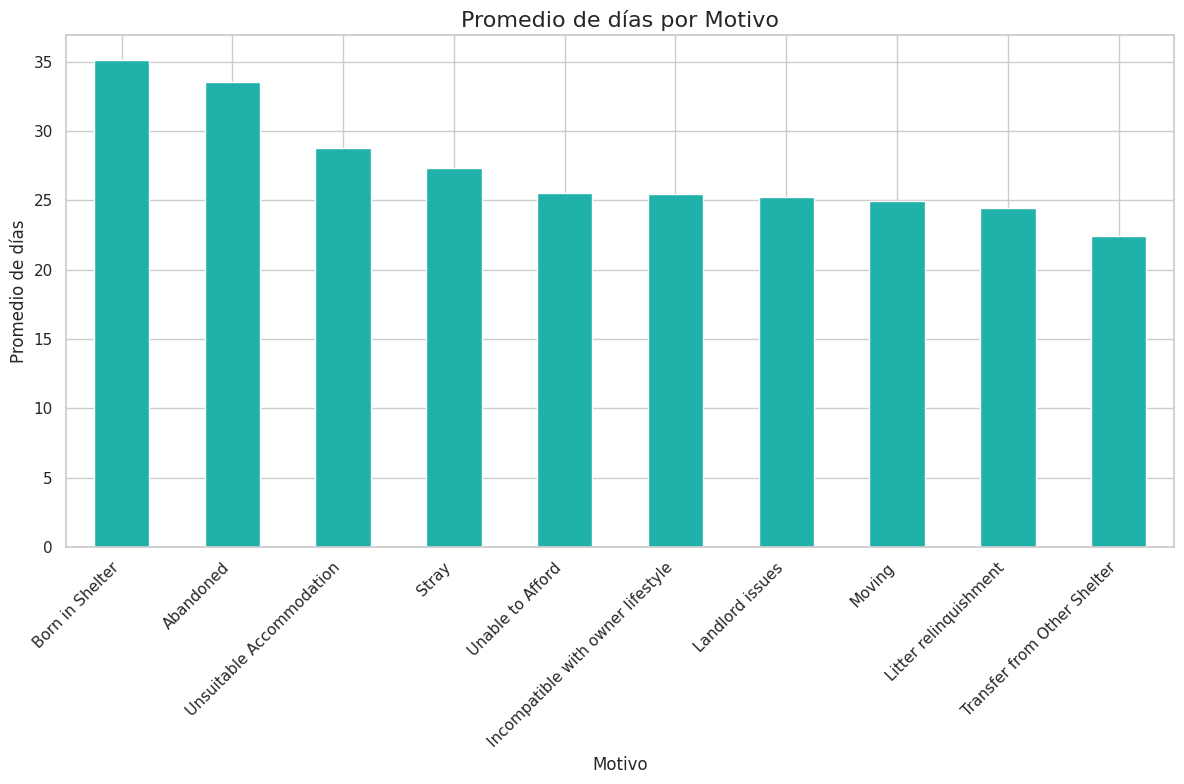

In [ ]:

# Encontrar los intakereason más comunes (por ejemplo, los top 10)
cat_top_intakereason = cat_data_dias['intakereason'].value_counts().head(10).index.tolist()

# Filtrar el DataFrame para incluir solo los intakereason más comunes
cat_filtered_data_top_intakereason= cat_data_dias[cat_data_dias['intakereason'].isin(cat_top_intakereason)]

# Calcular la media de 'date_difference' por cada intakereason más común
cat_intakereason_means = cat_filtered_data_top_intakereason.groupby('intakereason')['date_difference'].mean().sort_values(ascending=False)

# Graficar el promedio de días para los intakereason más comunes
plt.figure(figsize=(12, 8))
cat_intakereason_means.plot(kind='bar', color='lightseagreen')
plt.title('Promedio de días por Motivo', fontsize=16)
plt.xlabel('Motivo', fontsize=12)
plt.ylabel('Promedio de días', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

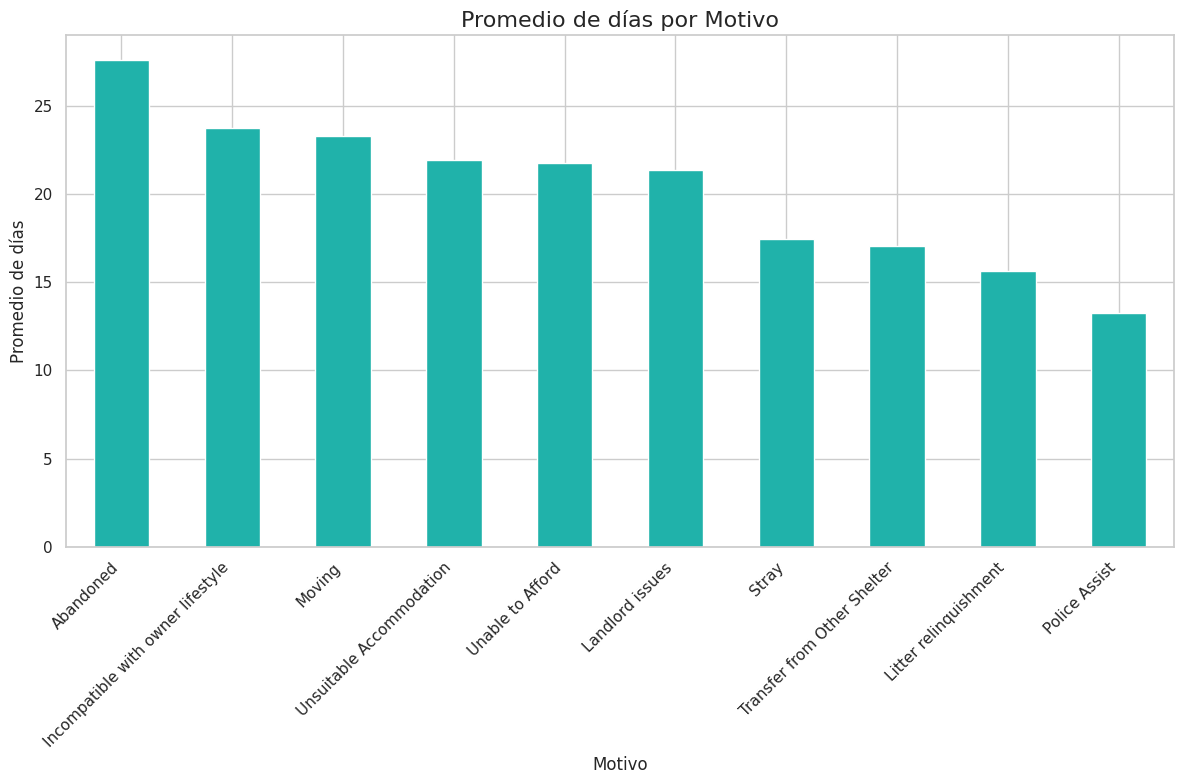

In [ ]:
# Encontrar los intakereason más comunes (por ejemplo, los top 10)
dog_top_intakereason = Dog_data_dias['intakereason'].value_counts().head(10).index.tolist()

# Filtrar el DataFrame para incluir solo los intakereason más comunes
dog_filtered_data_top_intakereason= Dog_data_dias[Dog_data_dias['intakereason'].isin(dog_top_intakereason)]

# Calcular la media de 'date_difference' por cada intakereason más común
dog_intakereason_means = dog_filtered_data_top_intakereason.groupby('intakereason')['date_difference'].mean().sort_values(ascending=False)

# Graficar el promedio de días para los intakereason más comunes
plt.figure(figsize=(12, 8))
dog_intakereason_means.plot(kind='bar', color='lightseagreen')
plt.title('Promedio de días por Motivo', fontsize=16)
plt.xlabel('Motivo', fontsize=12)
plt.ylabel('Promedio de días', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()